## ----- Data Cleaning and preprocessing

In [1]:
# Importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### There are 3 datasets which are needed and we have to combine them for further analysis

In [2]:
df1=pd.read_csv(r"C:\Users\91701\Downloads\C6 Input Files\C6 Input Files\Dataset\dim_repondents.csv")
df2=pd.read_csv(r"C:\Users\91701\Downloads\C6 Input Files\C6 Input Files\Dataset\fact_survey_responses.csv")
df3=pd.read_csv(r"C:\Users\91701\Downloads\C6 Input Files\C6 Input Files\Dataset\dim_cities.csv")

In [3]:
df1.head(3)

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116


In [4]:
df1.info()
# no null values and this dataset has 10k rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [5]:
df2.head(3)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late


In [6]:
df2.info()
# # no null values and this dataset has 10k rows and 23 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [7]:
df3.head(3)

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1


In [8]:
df3.info()
# no null values and this dataset has 10 rows and 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [9]:
# lets merge df1 and df2 on the basis of common column "Respondent_ID"
df4=pd.merge(df1, df2, on = 'Respondent_ID')

In [10]:
df4.head(2)

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,Trisha Rout,19-30,Male,CT118,103002,2-3 times a month,Throughout the day,To boost performance,No,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise


In [11]:
# lets merge df3 and df4 on the basis of common column "City_ID"
df=pd.merge(df4, df3, on = 'City_ID')


### this is our final dataset for analysis

In [12]:
df.head(2)

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Ahmedabad,Tier 2
1,120055,Umang Sarkar,31-45,Non-binary,CT117,103025,Once a week,Before exercise,To enhance sports performance,Yes,...,No,No,Outdoor billboards,Eco-friendly design,No,Above 150,Gyms and fitness centers,Studying/working late,Ahmedabad,Tier 2


In [13]:
# lets remove the column which are not needed
df.drop(["Name","Respondent_ID"],axis=1,inplace=True)

In [14]:
df.info()
# this dataset is having 10k rows and 27 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  object
 1   Gender                          10000 non-null  object
 2   City_ID                         10000 non-null  object
 3   Response_ID                     10000 non-null  int64 
 4   Consume_frequency               10000 non-null  object
 5   Consume_time                    10000 non-null  object
 6   Consume_reason                  10000 non-null  object
 7   Heard_before                    10000 non-null  object
 8   Brand_perception                10000 non-null  object
 9   General_perception              10000 non-null  object
 10  Tried_before                    10000 non-null  object
 11  Taste_experience                10000 non-null  int64 
 12  Reasons_preventing_trying       10000 non-null 

# Exploratory Data Analysis

### 1. Demographic Insights 

a. Who prefers energy drink more? (male/female/non-binary?)

b. Which age group prefers energy drink more?

c. Which type of marketing reaches the most Youth (15-30)?

1-a. Who prefers energy drink more? (male/female/non-binary?)

In [15]:
pallete=['red','green','cyan','blue','yellow','salmon','orange']

In [16]:
df_gen=(df["Gender"].value_counts()/100).sort_values(ascending=True).to_frame().reset_index().rename(columns={'index':'gender','Gender':'Percentage'})

[Text(0, 0, '5.07'), Text(0, 0, '34.55'), Text(0, 0, '60.38')]

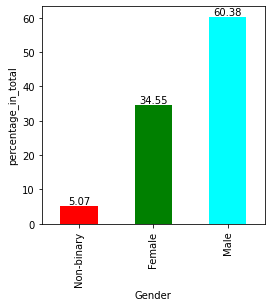

In [17]:
plt.figure(figsize=(4, 4))
plt.xlabel('Gender')
plt.ylabel('percentage_in_total')
fig=(df["Gender"].value_counts()/100).sort_values(ascending=True).plot.bar(color=pallete)
# plt.bar_label()
plt.bar_label(fig.containers[0])

In [18]:
df["Gender"].value_counts()/100

Male          60.38
Female        34.55
Non-binary     5.07
Name: Gender, dtype: float64

### conclusion -Males prefer energy drink most with higest percentage which is 60.38% while women taking place with around 35% 

1-b. Which age group prefers energy drink more?

Text(0.5, 0, 'percentage_in_total')

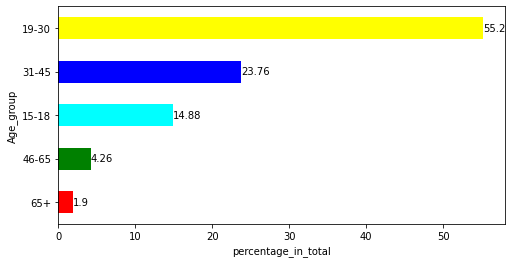

In [19]:
plt.figure(figsize=(8, 4))
plt.ylabel('Age_group')
plt.xlabel('percentage_in_total')
fig=(df["Age"].value_counts()/100).sort_values(ascending=True).plot.barh(color=pallete)
plt.bar_label(fig.containers[0])
plt.xlabel('percentage_in_total')

### conclusion- Age group 19-30 prefers energy drink most taking lead place with around 55% while around 39% customers belong to 15-18 and 31-45 age group so you can not ignore this fact as well

In [20]:
round(df["Age"].value_counts()/100)

19-30    55.0
31-45    24.0
15-18    15.0
46-65     4.0
65+       2.0
Name: Age, dtype: float64

1-c. Which type of marketing reaches the most Youth (15-30)?

In [21]:
df[(df["Age"]=="15-18") | (df["Age"]=="19-30")].shape

(7008, 27)

In [22]:
round(df[(df["Age"]=="15-18") | (df["Age"]=="19-30")]["Marketing_channels"].value_counts()/70.08)

Online ads            48.0
TV commercials        25.0
Outdoor billboards    10.0
Other                 10.0
Print media            6.0
Name: Marketing_channels, dtype: float64

[Text(0, 0, '6.4'),
 Text(0, 0, '10.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '25.5'),
 Text(0, 0, '48.1')]

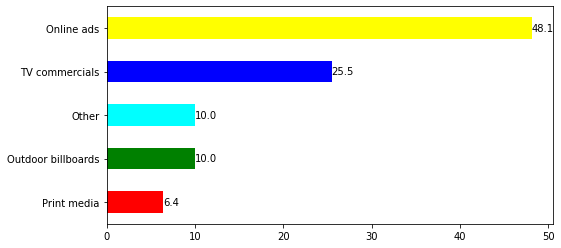

In [23]:
plt.figure(figsize=(8, 4))
fig=(df[(df["Age"]=="15-18") | (df["Age"]=="19-30")]["Marketing_channels"].value_counts()/70.08).sort_values(ascending=True).plot.barh(color=pallete)
plt.bar_label(fig.containers[0],fmt='%.1f')
#plt.xlabel('Marketing_channels')

### conclusion- For age group 15-30 ,Online ads have taken first place with 48% while though TV commercials also around 25% young people are watching ads after that Outdoor billboards taking place with  10% 

## Consumer Preferences

a. What are the preferred ingredients of energy drinks among respondents?

b. What packaging preferences do respondents have for energy drinks?

2-a. What are the preferred ingredients of energy drinks among respondents?

[Text(0, 0, '15.5'),
 Text(0, 0, '20.2'),
 Text(0, 0, '25.3'),
 Text(0, 0, '39.0')]

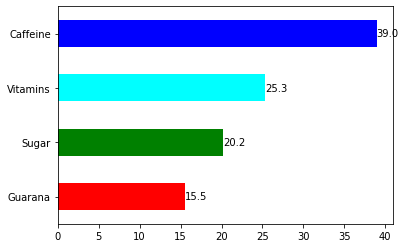

In [24]:
fig=(df["Ingredients_expected"].value_counts()/100).sort_values(ascending=True).plot.barh(color=pallete)
plt.bar_label(fig.containers[0],fmt='%.1f')

### conclusion-- Among 10k respondents 39% are expecting caffeine ,25% Vitamines while Sugar and Gurana haing 3rd and 4th place with 20% and 16% .

In [25]:
(df["Ingredients_expected"].value_counts()/100)

Caffeine    38.96
Vitamins    25.34
Sugar       20.17
Guarana     15.53
Name: Ingredients_expected, dtype: float64

In [26]:
# I tried to see the relationship between age group and ingredients expected but there is no 
# correlation between them 
# df[(df["Age"]=="19-30")]["Ingredients_expected"].value_counts()/55.20 
#do the same for other age groups as well

2-b. What packaging preferences do respondents have for energy drinks?

In [27]:
data=(df["Packaging_preference"].value_counts()/100)

[Text(0, 0, '4.8'),
 Text(0, 0, '9.8'),
 Text(0, 0, '15.0'),
 Text(0, 0, '30.5'),
 Text(0, 0, '39.8')]

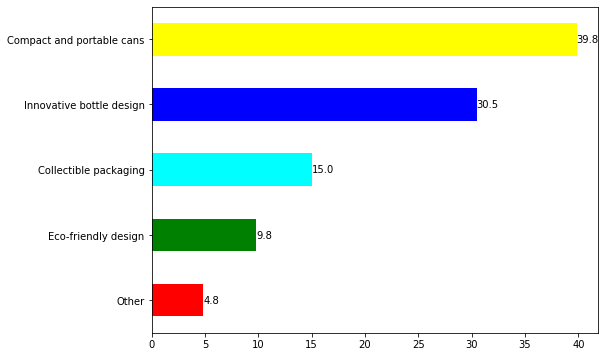

In [28]:
plt.figure(figsize=(8,6))
fig=data.sort_values(ascending=True).plot.barh(color=pallete)
plt.bar_label(fig.containers[0],fmt='%.1f')

### conclusion- Among 10k respondents 40% people are using 'Compact and portable cans' and 30% 'Innovative bottle design'  while 'Collectible packaging 'and 'Eco-friendly design' are taking 3rd and 4th place with 15% and 10%

## 3. Competition Analysis:

a. Who are the current market leaders?

b. What are the primary reasons consumers prefer those brands over ours?

3-a. Who are the current market leaders?

[Text(0, 0, '4.8'),
 Text(0, 0, '9.8'),
 Text(0, 0, '9.8'),
 Text(0, 0, '10.6'),
 Text(0, 0, '18.5'),
 Text(0, 0, '21.1'),
 Text(0, 0, '25.4')]

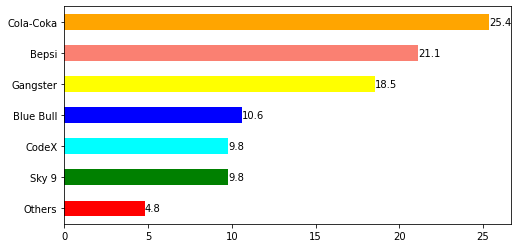

In [29]:
fig=(df["Current_brands"].value_counts()/100).sort_values(ascending=True).plot.barh(color=pallete,figsize=(8,4))
plt.bar_label(fig.containers[0],fmt='%.1f')

In [30]:
df["Current_brands"].value_counts()/100

Cola-Coka    25.38
Bepsi        21.12
Gangster     18.54
Blue Bull    10.58
CodeX         9.80
Sky 9         9.79
Others        4.79
Name: Current_brands, dtype: float64

### Conclusion--Cola-Coka is on the top with 25.38% and Bepsi on the second place with 21% ,Gangster ,'Blue Bull',"Codex" are taking 3rd, 4th,5th place with 19%,11% and 10% respectively

## CodeX and 'Sky 9' is having almost same percentage of customers which is 9.8% 

3-b. What are the primary reasons consumers prefer those brands over ours

In [69]:
x=round(df[df["Current_brands"]!="CodeX"]["Reasons_for_choosing_brands"].value_counts()/90.20,1)

In [70]:
x

Brand reputation           26.5
Taste/flavor preference    20.3
Availability               19.0
Effectiveness              17.4
Other                      16.8
Name: Reasons_for_choosing_brands, dtype: float64

[Text(0, 0, '16.8'),
 Text(0, 0, '17.4'),
 Text(0, 0, '19.0'),
 Text(0, 0, '20.3'),
 Text(0, 0, '26.5')]

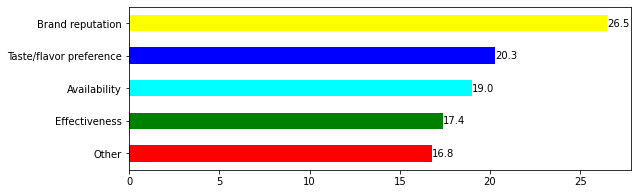

In [71]:
fig=x.sort_values(ascending=True).plot.barh(color=pallete,figsize=(9,3))
plt.bar_label(fig.containers[0],fmt='%.1f')

## Around 27% are choosing brand just because of 'Brand Reputation'  and 20% are preferring beacause of 'taste/flavour'  and 19% are taking because of 'availability' and 17% because of enery drink "effectiveness"

conclusion- As the data is showing that all these above reasons for choosing other brands over  CODEX are contributing almost with the same importance . so we must focus on each category of reason for chosing other brands equally ,like on the first place brand reputation is on the first place with 27 percentage of people, the reason is
1-Brands save decision making time
2-Brands provids safety
3-Brand adds value
4-Strong Brands give consumers a reason to share their experience. and so on 
so it becomes very important to creat a brand 

In [34]:
#round(df[df["Current_brands"]=="CodeX"]["Reasons_for_choosing_brands"].value_counts()/9.81)

## 4.Marketing Channels and Brand Awareness

a. Which marketing channel can be used to reach more customers?

b. How effective are different marketing strategies and channels in reaching our customers?

4-a. Which marketing channel can be used to reach more customers?

## 1-overall marketing channels

<AxesSubplot:ylabel='Marketing_channels'>

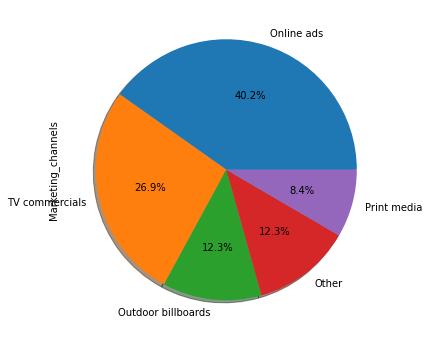

In [35]:
plt.figure(figsize=(8,6))
df["Marketing_channels"].value_counts().plot(kind="pie",autopct='%1.1f%%',shadow=True)

## 2-for young population

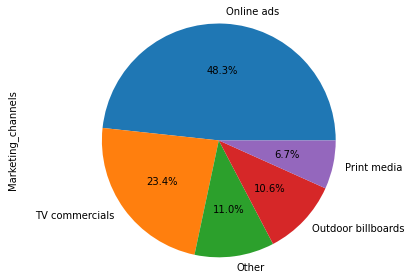

In [36]:
young =(df[df["Age"]=="19-30"]["Marketing_channels"].value_counts()/55.20)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the pie chart
young.plot(kind='pie', ax=ax, autopct='%1.1f%%')

# Set aspect ratio to make the pie circular
ax.axis('equal')

# Set title


# Show the chart
plt.tight_layout()
#ax.set_title('for 19-30 Age group')
plt.show()

# other people

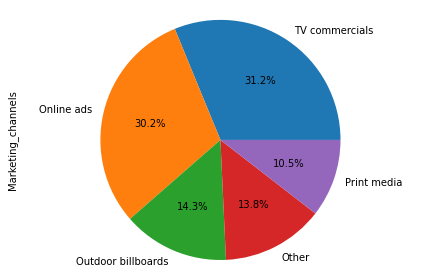

In [37]:
other =(df[df["Age"]!="19-30"]["Marketing_channels"].value_counts()/44.80)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the pie chart
other.plot(kind='pie', ax=ax, autopct='%1.1f%%')

# Set aspect ratio to make the pie circular
ax.axis('equal')

# Set title


# Show the chart
plt.tight_layout()
#ax.set_title('for 19-30 Age group')
plt.show()

In [38]:
df["Age"].value_counts()/100

19-30    55.20
31-45    23.76
15-18    14.88
46-65     4.26
65+       1.90
Name: Age, dtype: float64

48% people are preferring online ads in the age of 19-30 because youth is active on social media but on the other hand you can not ignore the fact that our remaining audience are seeing the production throught "TV commercials" as well in a good number.so you have to keep it in mind that while planning marketing don't ignore the "TV commercials" .

4-b. How effective are different marketing strategies and channels in reaching our customers?

In [39]:
#round(df[df["Tried_before"]=="Yes"]["Marketing_channels"].value_counts()/48.81)

In [40]:
round(df[df["Current_brands"]=="CodeX"]["Marketing_channels"].value_counts()/9.80)

Online ads            42.0
TV commercials        27.0
Outdoor billboards    12.0
Other                 12.0
Print media            7.0
Name: Marketing_channels, dtype: float64

[Text(0, 0, '7.4'),
 Text(0, 0, '11.8'),
 Text(0, 0, '12.1'),
 Text(0, 0, '26.6'),
 Text(0, 0, '41.9')]

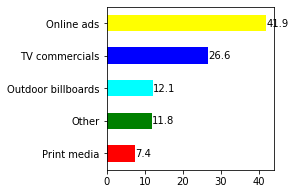

In [41]:

fig=(df[df["Current_brands"]=="CodeX"]["Marketing_channels"].value_counts()/9.80).sort_values(ascending=True).plot.barh(color=pallete,figsize=(3,3))
plt.bar_label(fig.containers[0],fmt='%.1f')

out of 980 custumers who has codex as their favourite brand,around 42% of them got to know through
online ads and around 27% through tv commercials

## 5-Brand Penetration
a. What do people think about our brand? (overall rating)

b. Which cities do we need to focus more on?

a. What do people think about our brand? (overall rating)

<AxesSubplot:ylabel='Brand_perception'>

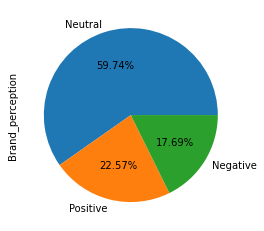

In [42]:
((df["Brand_perception"].value_counts()/100)).plot(kind="pie",autopct='%1.2f%%')

In [43]:
df["Brand_perception"].value_counts()/100

Neutral     59.74
Positive    22.57
Negative    17.69
Name: Brand_perception, dtype: float64

around 60% people are neutral about the brand and only 23% are feeling positive towards the brand
so overall 82% customers are having no hate about the brand but in future we can work on it as 60% people are finding it neutral jbki brand name must be so unique and impressive

b. Which cities do we need to focus more on?


In [44]:
data=df.groupby("City")["Heard_before"].value_counts()
m=data.rename("count").to_frame().reset_index()
df11=m.groupby('City')["count"].sum()
t=pd.merge(m,df11,on='City',how='left')
t["per"]=np.ceil((t["count_x"]/t['count_y'])*100)
t.drop(columns=["count_x","count_y"],inplace=True)

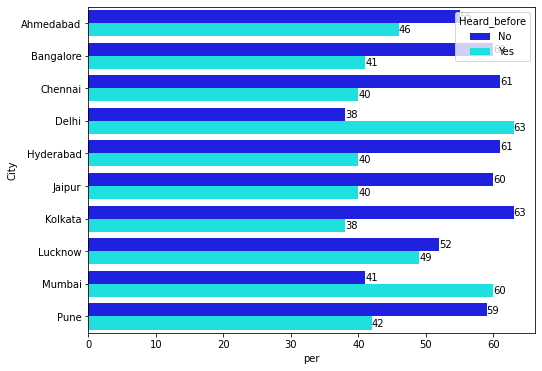

In [45]:
plt.figure(figsize=(8,6))
fig=sns.barplot(data=t, y="City", x="per", hue="Heard_before",palette=["blue", "cyan"])
for container in fig.containers:
    fig.bar_label(container)

## 6. Purchase Behavior:
a. Where do respondents prefer to purchase energy drinks?

b. What are the typical consumption situations for energy drinks among 
respondents?

c. What factors influence respondents' purchase decisions, such as price range and 
limited edition packaging?

6-a. Where do respondents prefer to purchase energy drinks?

In [46]:
round(df["Purchase_location"].value_counts()/100)

Supermarkets                45.0
Online retailers            26.0
Gyms and fitness centers    15.0
Local stores                 8.0
Other                        7.0
Name: Purchase_location, dtype: float64

 #### supermarkets are on the top place having 45% customers while 26% customers are purchasing through  'Online Retailers'

[Text(0, 0, '6.8'),
 Text(0, 0, '8.1'),
 Text(0, 0, '14.6'),
 Text(0, 0, '25.5'),
 Text(0, 0, '44.9')]

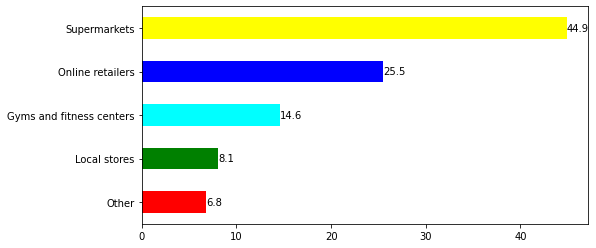

In [47]:
fig=round((df["Purchase_location"].value_counts()/100).sort_values(ascending=True),1).plot(kind="barh",color=pallete,figsize=(8,4))
plt.bar_label(fig.containers[0])

6b. What are the typical consumption situations for energy drinks among respondents?

In [48]:
round(df["Consume_time"].value_counts()/100)

To stay awake during work/study    34.0
Before exercise                    31.0
For mental alertness               20.0
Throughout the day                 14.0
Name: Consume_time, dtype: float64

[Text(0, 0, '14.5'), Text(0, 0, '20'), Text(0, 0, '31.5'), Text(0, 0, '34.1')]

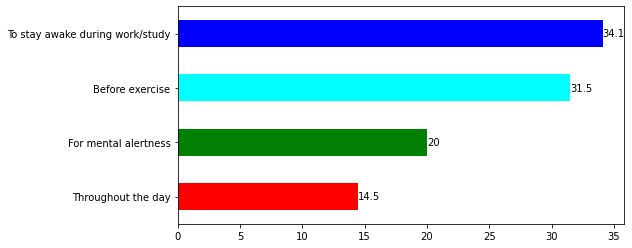

In [49]:
fig=round((df["Consume_time"].value_counts()/100).sort_values(ascending=True),1).plot(kind="barh",color=pallete,figsize=(8,4))
plt.bar_label(fig.containers[0])

6c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [50]:
# trying to catch the behaviour of purchasing on the basis of 1-gender ,2-age-group,3-price_range,
#4-city_wise


### definately AGE is a factor for variation in price range .people above age 30  around 69% are buying  energy drink of 100+ rs.while people with less age go for price range 50-99 .
#### we can launch different energy drinks for different buckets of price.

In [51]:
single=(df[(df["Age"]=="15-18") | (df["Age"]=="19-30")]["Price_range"].value_counts()/70.08)

In [52]:
single

50-99        52.111872
100-150      24.443493
Above 150    13.356164
Below 50     10.088470
Name: Price_range, dtype: float64

[Text(0, 0, '10'), Text(0, 0, '13'), Text(0, 0, '24'), Text(0, 0, '52')]

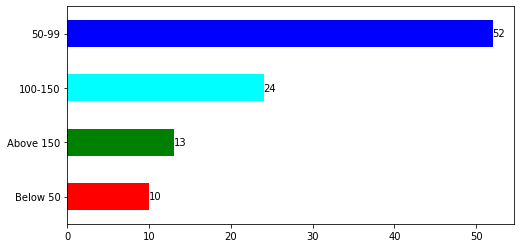

In [53]:
fig=round(single.sort_values(ascending=True)).plot(kind="barh",color=pallete,figsize=(8,4))
plt.bar_label(fig.containers[0])

In [54]:
mingle=round(df[(df["Age"]!="15-18") & (df["Age"]!="19-30")]["Price_range"].value_counts()/29.92)

[Text(0, 0, '10'), Text(0, 0, '21'), Text(0, 0, '21'), Text(0, 0, '48')]

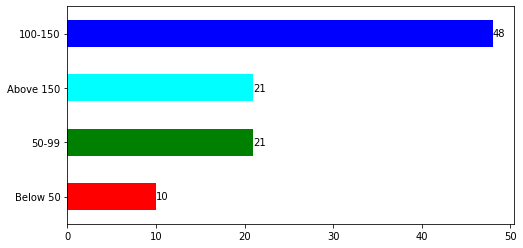

In [55]:
fig=round(mingle.sort_values(ascending=True)).plot(kind="barh",color=pallete,figsize=(8,4))
plt.bar_label(fig.containers[0])

### 7. Product Development
a. Which area of business should we focus more on our product development? 
(Branding/taste/availability)

ans=all of three (show it on the basis of data)


In [56]:
round(df["Reasons_for_choosing_brands"].value_counts()/100)

Brand reputation           27.0
Taste/flavor preference    20.0
Availability               19.0
Effectiveness              17.0
Other                      17.0
Name: Reasons_for_choosing_brands, dtype: float64

In [57]:
df[df["Taste_experience"]>=3].shape[0]/100

74.22

[Text(0, 0, '16.79'),
 Text(0, 0, '17.48'),
 Text(0, 0, '19.1'),
 Text(0, 0, '20.11'),
 Text(0, 0, '26.52')]

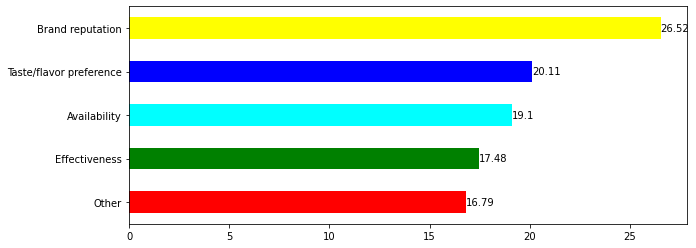

In [58]:
fig=(df["Reasons_for_choosing_brands"].value_counts()/100).sort_values(ascending=True).plot(kind="barh",color=pallete,figsize=(10,4))
plt.bar_label(fig.containers[0])

each factor has importance but we should start with brand reputation and then availabilty because
taste is good in future we can focus on it as well 